<a href="https://colab.research.google.com/github/MinjuKim0217/Hands_On_Machine_Learning/blob/main/%5BHands_On_ML%5D_Chapter_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#기본설정
import numpy as np ##배열, 3장에서는 DataFrame은 다루지 않음
import os  ##사실 3장에서는 필요 없음
import matplotlib ##그림용
import matplotlib.pyplot as plt ##그림용
import sklearn ##사이킷런

np.random.seed(42) ##랜덤시드

matplotlib.rc('font', family='NanumBarunGothic') ##matplotlib 한글을 위해
plt.rcParams['axes.unicode_minus'] = False ##한글을 위해

In [2]:
from sklearn.datasets import fetch_openml ##책과 다름. 유의
mnist = fetch_openml('mnist_784', version=1) ##mnist는 Bunch라는 자료구조
X, y = mnist["data"], mnist["target"] ##numpy의 배열로 저장
y = y.astype(np.int) ##mnist의 target이라는 key안에는 value가 문자열로 저장되어 있음. int로 바꿔줘야함.
###읭스럽게도 4번 돌리면 home/scikit_learn_datasets/~/opemml.org에 data가 생김

In [4]:
print(X.shape) ## 결과 (70000, 784)
print(y.shape) ## 결과 (70000,)

(70000, 784)
(70000,)


Bunch 자료형은 value를 부를 때, DATA.KEY라는 식으로도 value를 부를 수 있음

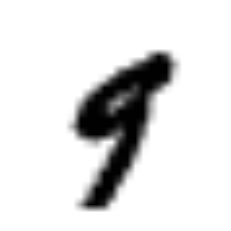

In [3]:
some_digit_9 = X[36000]
some_digit_9_image = some_digit_9.reshape(28, 28) ### image 픽셀의 형태대로 shape를 만듦
plt.imshow(some_digit_9_image, cmap = matplotlib.cm.binary,
           interpolation="bilinear")
###matplotlib.cm.binary: 색 입히는 방식.색을 흰색에서부터 검은색으로 칠해줌
###interpolation의 default값이 nearest임
plt.axis("off")

plt.show()

In [5]:
y[36000] 

9

훈련세트와 테스트세트를 나누자. 

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 이진 분류기 훈련

In [8]:
y_train_5 = (y_train == 5) ##bool 값으로 나옴
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42) ##4단원에서 자세히 하겠습니다.
sgd_clf.fit(X_train, y_train_5) ##fit 메소드를 사용, 각 객체 변수에 특정 값들을 저장.
sgd_clf.predict([some_digit_9, X[1]]) ##some_digit_9은 (1, 784) 배열
##some_digit_9이 5인가 ==> false

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([False, False])

#성능 측정

## 교차검증을 사용한 정확도 측정

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)  ###랜덤 시드 42로 총 3번 train set과 test set을 나눔

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) ###sgd_clf의 clone을 만듦
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold) ##bool 값을 sum하면 true의 개수가 나옴. 사실 파이썬에서 True=1, False=0
    print(n_correct / len(y_pred)) ## scoring =' accuracy'

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.964


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9579
0.9571


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
## scoring ='acuracy' 는 맞은 개수 나누기 전체 개수


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.964 , 0.9579, 0.9571])

95% 성능을 내는 분류기를 만듦. 

but 샘플 개수의 차이가 많이 나는 분류기에서 교차 검증은 효과적이지 못하다. 

ex.만약 데이터 '5'가 10개 , '5가 아닌것' 이 90개 이면 모든 샘플에게 5가 아니라고 말하는 분류기의 정확도는 90%이다. 

모든것을 5가 아니라고 말하는 분류기를 만들어서 교차검증 해보자

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None): ##cross_val_score에 들어가려면 필요함
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
###cross_val_score 안에 자동으로 fit 매소드와 .predict 객체변수를 불러오는 듯

array([0.909  , 0.90745, 0.9125 ])

무려 정확도가 90%가 높게 나옴-> 좋지 않은 모델이다. 

그러므로 클래스별로 샘플 개수가 많이 차이나는 데이터셋을 분류할 때 교차검증은 효과적이지 못한다. 

## 오차행렬

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
## cv=3이니깐 데이터 셋을 1,2,3으로 나누고
## 1,2로 3을 예측 & 1,3으로 2를 예측 $ 2,3으로 1을 예측하고
## 우측에 있는 예측 값들을 반환함

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]])

실제로 5가 아닌 것을 모델이 5가 아니라고 말한 개수가 52972

실제로 5가 아닌 것을 모델이 5라고 말한 개수가 1607

실제로 5인 것을 모델이 5가 아니라고 말한 개수가 989

실제로 5인 것을 모델이 5라고 말한 개수가 4432

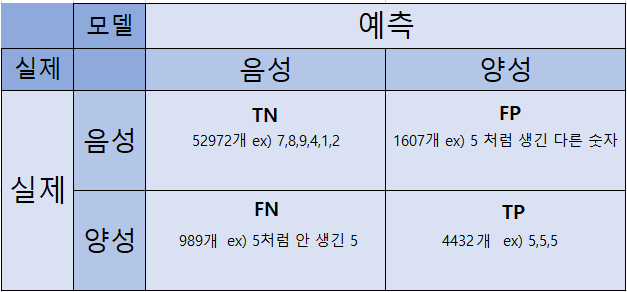

행: 실제 클래스, 열: 예측 클래스

TN 진짜 음성(음성, 양성은 예측을 기준으로 
말합니다.)

FP 거짓 양성

FN 거짓 음성

TP 진짜 양성

정밀도 = TP/(TP+FP)

재현율 = TP/(TP+FN)


이런 비율을 정의함으로서 저희는 각 클래스에 객체수에 상관없이 모델의 성능을 측정할 수 있습니다.

## 정밀도와 재현율

In [17]:
from sklearn.metrics import precision_score, recall_score

print (precision_score(y_train_5, y_train_pred)) #정밀도
print (recall_score(y_train_5, y_train_pred)) #재현율

0.8711352955725946
0.6496956281128943


또 다른 지표가 있는데 F1 점수라고 합니다.

F1=2/{(1/precision)+(1/recall)}



In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7442941673710904

## 정밀도/재현율 트레이트 오프

모델을 훈련 시키면 모델은 각 데이터에게 점수를 줍니다. 

밑에 그림을 보면 각 점수가 1, 10, 20, 30, 40, 50, 60, 70 입니다. 

이때 이 점수가 결정 임곗값(threshold)을 넘으면 양성, 넘지 않으면 음성입니다. 

여기서 중요한게 결정 임곗값에 따라 정밀도와 재현율이 달라집니다. 

그림에서 볼 수 있듯이 임곗값이 올라갈 수록 정밀도는 커지고 재현율은 줄어듭니다.
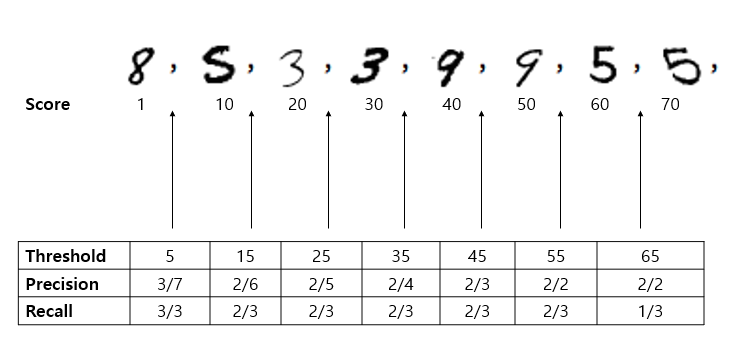

가장 기초적으로는 임곗값이 올라가면 FP가 감소하고 FN이 증가합니다.

이해가 쉽도록 몇 가지 성질을 말해보겠습니다.

- 임곗값 증가 »> 정밀도 증가, 재현율 감소

- 임곗값 감소 »> 재현율 감소, 정밀도 증가

- FP 감소 & FN 증가 »> 정밀도 증가

- FP 증가 & FN 감소 »> 재현율 증가

좀 더 나아가서 말로 풀어보겠습니다.

- 정밀도가 높다 - 거짓을 잘 구분해낸다. 참을 놓칠 수 있다.

- 재현율이 높다 - 거짓을 잘 구분하지 못한다. 참을 놓치지 않는다.

- 정밀도가 높다 - 참이라고 말한 것 중에 참인 것이 많다.

- 정밀도가 높다 - 거짓인 것 중 거짓이라고 말한 것이 많다.

- 재현율이 높다 - 참인 것 중 참이라고 말한 것이 많다.

- 재현율이 높다 - 거짓이라고 말한 것 중 거짓인 것이 많다.

결과적으로 두 지표는 트레이드 오프 관계입니다. 

상황에 따라 정밀도가 중요한 상황과 재현율이 중요한 상황이 있습니다.

1. 암환자를 구별할 때, 임곗값을 낮춰서 재현율을 높이는 것이 좋습니다. 왜냐하면 실제로 암에 걸리지는 않은 환자가 있을 수는 있지만 암에 걸린 환자는 확실히 치료를 시도할 수 있으니까요.


2. 판사가 재판을 할 때, 임곗값을 높여서 정밀도를 높이는 것이 좋습니다. 왜냐하면 무죄추정의 원칙에 의해서 무고한 사람이 감옥에 가면 안되기 때문입니다.

In [20]:
# 적절한 임곗값을 구하기 위해 모든 샘플의 점수 구하기
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")
##어떤 식으로 scoring을 계산하는지는 모릅니다.
##나중에 4단원에서 안나오면 다시 공부할 것입니다.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [21]:
# 이 점수로 precision_recall_curve() 함수를 사용해서 가능한 임곗값에 대해 정밀도와 재현율 그래프 그려보자
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [22]:
y_train_pred_90 = (y_scores > 70000) ##대충보고... 임계값을 설정
print(precision_score(y_train_5, y_train_pred_90)) #정밀도 계산
print(recall_score(y_train_5, y_train_pred_90)) #재현율 계산

0.9309882747068676
0.5126360450101457


## ROC곡선

거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR, 재연율의 다른 이름)입니다.

- 거짓 양성 비율(FPR) = FP/(FP+TN) (낮을 수록 좋음)

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

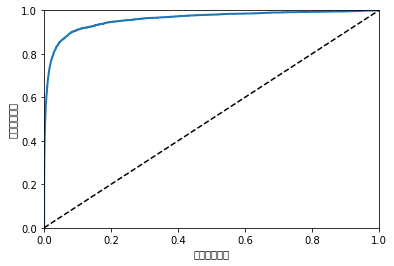

In [25]:
def plot_roc_curve(fpr,tpr, label=None):
  plt.plot(fpr,tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('거짓양성비율')
  plt.ylabel('진짜양성비율')

plot_roc_curve(fpr, tpr)

거짓 양성 비율도 진짜 양성 비율(재현율)과 트레이드오프 관계가 있습니다. 좋은 분류기는 y=x 그래프와 ROC 곡선이 최대한 멀리 떨어져 있어야 합니다. 곡선 아래의 면적을 새로운 지표로 생각하고 이를 통해 분류기들을 비교할 수 있습니다. 이를 AUC(area under the curve) 측정 이라고 합니다.

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] ## 5 클래스에 들어갈 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
## y_train_5는 bool 값을 가지고 있는 배열

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

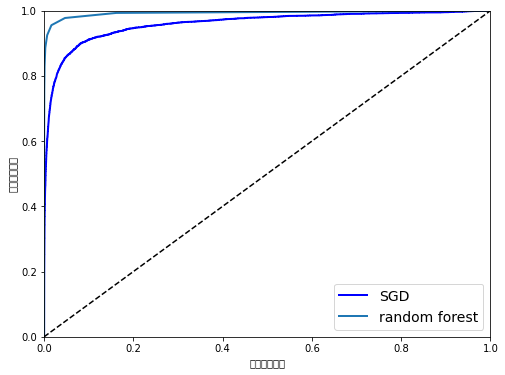

In [30]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="random forest")
plt.legend(loc="lower right", fontsize=14)
plt.show()

In [31]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

이것으로 RandomForestClassifier가 SGDClassifier보다 좋은 것을 알 수 있습니다. 

추가로 정밀도와 재현율을 구해보겠습니다.

In [32]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [33]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

# 다중 분류

이진 분류가 두 개의 클래스를 구별한다면 다중 분류기는 둘 이상의 클래스를 구별할 수 있습니다. 하지만 일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있지만, 몇 몇 알고리즘은 이진 분류만 가능합니다. 그럼에도 불구하고 이진 분류기를 여러 개 이용해 다중 클래스를 분류하는 기법도 있습니다.



1. 일대다(OvA)전략: 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개(0에서 부터 9까지)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있습니다. 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 됩니다.

2. 일대일(OvO)전략: 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것입니다. 따라서 클래스가 N개라면 분류기는 N * (N - 1) / 2개가 필요합니다. 이미지 하나를 분류하려면 46개 분류기 모두를 통과시켜서 가장 많이 양성으로 분류된 클래스를 선택하면 됩니다.

- 일대일(OvO) 전략의 주요 장점은 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것입니다.

- 예를 들어 서포트 벡터 머신 같은 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠릅니다.

- 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA 혹은 OvO를 적용합니다.

In [34]:
# SGDCLASSIFIER 훈령
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit_9])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([9])

In [35]:
some_digit_9_scores = sgd_clf.decision_function([some_digit_9])
some_digit_9_scores

array([[-780634.17445014, -367988.10902669, -857510.2219226 ,
        -109587.17435534,   -6978.239532  , -120352.38122307,
        -785831.32198027, -377771.38059503, -198143.6559996 ,
         107815.22648992]])

In [36]:
np.argmax(some_digit_9_scores)

9

In [37]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
#OvO or OvA  강제로 선택 가능
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train) ##fit 매소드를 실행하면서 여러가지 객체 변수에 값을 집어넣음.
ovo_clf.predict([some_digit_9])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

array([4])

In [39]:

#분류기 갯수
len(ovo_clf.estimators_)

45

In [40]:
# RandomForestClassifier 훈련

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit_9])

array([9])

In [42]:
#분류기가 추정하는 정도
forest_clf.predict_proba([some_digit_9, X_train[10]])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [43]:
# 분류기의 교차 검증
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.83935, 0.85125, 0.8676 ])

In [44]:
#분류기에서도  scale 조정을 해주면 추정값이 좋아진다.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91155, 0.91005, 0.9095 ])

# 에러분석

원칙적으로는

1. 데이터 준비 단계에서 가능한 선택사항을 탐색하고
2. 여러 모델을 시도하고
3. 가장 좋은 몇개를 골라 GridSearchCV를 상ㅇ해 하이퍼파라미터를 세밀하게 튜닝하고
4. 파이프라인을 통해 가능한 자동화해야함

그러나 이 절에는 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아봄

한가지 방법은 에러의 종류를 분석하는 것

In [45]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3 )
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5722,    2,   28,    9,    8,   49,   51,   11,   41,    2],
       [   2, 6494,   47,   23,    6,   42,    5,   10,  100,   13],
       [  51,   37, 5360,   88,   82,   23,   96,   56,  149,   16],
       [  51,   37,  149, 5318,    2,  248,   37,   57,  134,   98],
       [  19,   25,   39,    8, 5378,    7,   54,   29,   77,  206],
       [  73,   42,   35,  170,   73, 4622,  105,   30,  177,   94],
       [  31,   24,   43,    2,   43,   88, 5635,    4,   47,    1],
       [  20,   20,   65,   27,   58,   11,    6, 5806,   12,  240],
       [  53,  147,   78,  164,   11,  163,   56,   24, 5017,  138],
       [  42,   27,   25,   87,  175,   34,    3,  201,   85, 5270]])

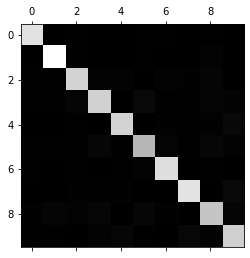

In [46]:
#열은 추정값, 행은 실제값
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

In [48]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a.sum(axis=1)  ### 2에서 1로 dim이 떨어짐

array([ 6, 15, 24])

In [49]:
a.sum(axis=1, keepdims=True) ### column을 유지하고 dim도 유지

array([[ 6],
       [15],
       [24]])

In [50]:
a.sum(axis= 0, keepdims= True) ### row를 유지하고 dim도 유지

array([[12, 15, 18]])

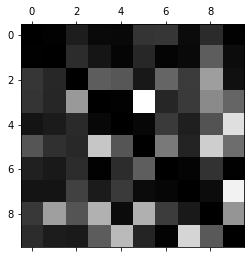

In [51]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

여기서 여러가지 분석을 할 수 있습니다.

- 8과 9의 열이 상당히 밝으므로 많은 이미지가 8과 9로 잘못 분류되었음을 암시합니다.
- 8과 9의 행도 밝으므로 숫자 8과 9가 다른 숫자들과 혼돈이 자주 됩니다.
- 1의 열은 매우 어두우므로 대부분의 숫자 1이 정확하게 분류되었음을 의미합니다.
- 에러는 대각선 기준 대칭이 아닙니다.

이 그래프를 살펴보면 3과 5가 서로 혼돈되는 것을 보완하고 8과 9를 더 잘 분류할 수 있도록 개선할 필요가 있습니다.

- 이 숫자들에 대한 훈련 데이터를 더 모을 수 있습니다.
- 분류기에 도움이 될 만한 특성을 더 찾아볼 수 있습니다.
- 예를 들어 동심원의 수를 세는 알고리즘을 추가할 수 있습니다.

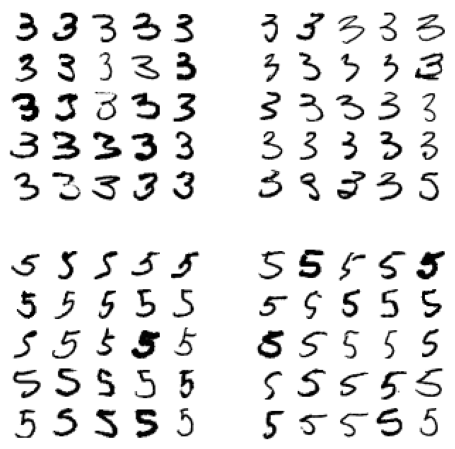

In [52]:
#우리의 분류기의 오차 행렬을 관찰했을 때, 우리의 분류기는 3과 5를 많이 헷갈려합니다. 이 개개의 에러를 분석하기 위해 3과 5의 샘플을 그려보겠습니다.

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# 다중 레이블 분류

In [54]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
knn_clf.predict([some_digit_9])

array([[ True,  True]])

# 다중 출력 분류

다중 출력 분류란 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것입니다 .

예를 들어 노이즈 제거가 있다.

In [57]:
# 노이즈가 들어간 샘플 만들기

noise=np.random.randint(0,100, (len(X_train), 784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100, (len(X_test), 784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [58]:
# 노이즈 들어간 샘플 그려보기

def plot_digit(data):
  image=data.reshape(28,28)
  plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
  plt.axis("off")

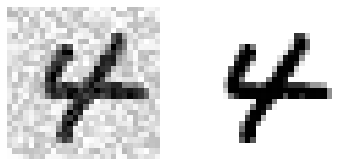

In [59]:
some_index=5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

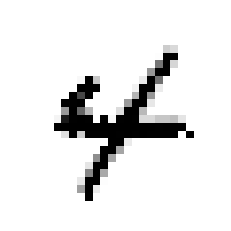

In [61]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)